<a href="https://colab.research.google.com/github/llRodroll/ML/blob/main/Basic/Red_Neuronal_B%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal - Básica

La idea es codificar una red neuronal básica en la cual busquemos predicir un resultado.

## Arquitectura de la RN

Gráficamente la estructura de la neurona es:

![Arquitectura RN](Basic_ANN.jpg)
    Fuente: https://www.youtube.com/watch?v=kft1AJ9WVDk

En este caso, se tienen los inputs y luego una capa que procesa y posteriormente el output. En otras palabras, es un Perceptron.

## Datos

Los datos con los cuales se va a trabajar son los siguientes:

| Ejp || $x_1$ | $x_2$ | $x_3$ || $y$ | 
|-----||-------|-------|-------||-----|
|  1  || 0     | 0     | 1     || 0   |
|  2  || 1     | 1     | 1     || 1   |
|  3  || 1     | 0     | 1     || 1   |
|  4  || 0     | 1     | 1     || 0   |

## Programar la RN

Para tal fin se utilizará la libreria numpy para realizar los operaciones entre los vectores.
Se crearán los datos input de training (la tabla anterior para $x_{1}, x_{2}$ y $x{3}$) mediante una matriz y los datos output ($y$) mediante un vector.

In [ ]:
import numpy as np

training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

training_outputs = np.array([[0,1,1,0]]).T # transpuesto en la medida que y es un vector colummna

Con esto ya quedaría las $x$'s y la y de la Ilustración anterior.

Lo siguiente sería establecer el vector de las ponderaciones $w$, para ello se "inicializará" el vector con valores aleatorios.
Para mantener sencillo el ejemplo, se desea que estos valores aleatorios estén entre -1 y 1.

Ahora bien, para lograr esto se utilizará una función que genera números aleatorios entre (0,1) de una distribución uniforme. Sin embargo, lo que se desea es que los números estén entre -1 y 1, por lo tanto se debe aplicar la propiedad de dicha distribución. A saber,

Sea $z\sim U(0,1)$, sean dos números tales que $b>a$. Entonces, $(b -a)z - a \sim U(a,b)$. **REVISAR FÓRMULA**

En este caso, $b=1$ y $a=-1$ y así $2z - 1 \sim U(-1,1)$.


In [ ]:
#np.random.seed(1)  # esto sirve para que todas las simulaciones sean iguales entre distintos computadores

pesos = 2*np.random.random((3,1)) - 1 # las dimensiones de los pesos son 3 filas y una columna 

print('Valores iniciales aleatorios de los pesos:')
print(pesos)

Valores iniciales aleatorios de los pesos:
[[-0.84814272]
 [-0.61096015]
 [ 0.57590452]]


### La función $\phi()$

La función $\phi()$ que está en la neurona tiene como objetivo convertir la suma ponderada de los pesos y los inputs en números que estén entre 0 y 1.

Existen muchos tipos de funciones para realizar esto, sin embargo, para este caso se utiliza la función sigmoide que tiene la siguiente forma:

$\phi(z) = 1/(1 + e^{-z})$

Con $z = \sum_{i=1}^3 x_{i}w{i}$

Para entender un poco mejor, el objetivo de la función veamos lo siguiente:

In [ ]:
print('Resultado de z (multiplicar pesos por inputs)')
print(np.dot(training_inputs,pesos))

Resultado de z (multiplicar pesos por inputs)
[[ 0.57590452]
 [-0.88319836]
 [-0.2722382 ]
 [-0.03505564]]


La función np.dot() realiza el producto punto entre $w$ y $x$ para obtener $z$.

Note que el valor de $z$ está lejos de tener la forma que necesitamos. Por ejemplo, todos los valores dan negativos lo cual no es adecuado dado que en el vector de outputs NO HAY NEGATIVOS.

Entonces, la función $\phi()$ lo que hace es llevar cualquier resultado o número que de $z$ al intervalo (0,1).
Para el caso puntual de la multiplicación anterior:

In [ ]:
z = np.dot(training_inputs,pesos)
print('Resultado del sigmoide sobre z')
print(1/(1+np.exp(z)))

Resultado del sigmoide sobre z
[[0.35987551]
 [0.70748456]
 [0.5676423 ]
 [0.50876301]]


Ahora sí, todos los valores están más acordes a los outputs que necesitamos. Pero todavia no al 100%, para ello tendremos que hacer algo adicional más adelante.

De formal más general, la función sigmoide tiene este comportamiento:

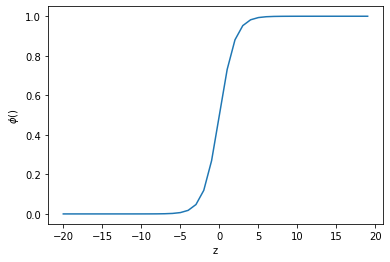

In [ ]:
z = np.arange(-20,20)  # secuencia de números desde -20 hasta 20
phi = 1/(1+np.exp(-z))  # sigmoide

import matplotlib.pyplot as plt # libreria para gráficos
plt.plot(z,phi)
plt.ylabel('$\phi()$')
plt.xlabel('z')
plt.show()

## Training de la RN

Bien, ahora que ya tenemos todos los elementos de la RN podemos pasar hacer el entrenamiento.
Qué quiere decir esto? El entrenamiento consiste en encontrar aquellos $w$ que hacen que el output de la RN $\hat{y}$ sea lo más cercano al output real $y$.

Para ello, contamos con diferentes alternativas, aunque solo vamos hacer dos. La primera consiste en decirle al programa que repita muchas veces un procedimiento hasta que el resultado que obtengamos nos sea satisfactorio.

La segunda comprende algo más de formalismo y establecemos una métrica de "éxito" para el programa.

### Primera Alternativa

Empecemos con la primera, La idea es realizar el siguiente procedimiento:

1. Tome los inputs de los datos para training y "paselos" por la neurona para obtener un $\hat{y}$.
2. Calcule el error de estimación, es decir la diferencia entre lo estimado y lo real: $\hat{y} - y$.
    
    Hasta este paso se llama FORWARD PROPAGATION.

3. Dependendiendo de la severidad del error, ajuste los pesos.

    3.1. Para ello, se toma la derivada de la función $\phi(z)$ que en este caso sería $\phi(z)' = z(1-z)$.
    
    3.2. Luego se multiplica dicha derivada por el error de estimación $\hat{y} - y$.
    
    3.3. Así, el ajuste a los pesos será $adj.pesos = (\hat{y} - y)(z(1-z))$.
        
4. Repetir el proceso 2,000 veces.
    Hasta acá se llama BACKWARDPROPAGATION.

In [ ]:
# Para facilitar el cálculo se definen las funciones de sigmoide y su derivada

def sigmoide(z):
    return 1/(1+np.exp(-z))

def der_sig(z):
    return z*(1-z)

for iteration in range(20000):

    input_layer = training_inputs
    
    outputs_est = sigmoide(np.dot(input_layer,pesos))
    
    error = training_outputs - outputs_est  
    
    ad_pesos = error*der_sig(outputs_est)
    
    pesos += np.dot(input_layer.T,ad_pesos) # el += significa p.j.: a=10; a+= 5 entonces a=15.

print('Pesos despues del Training')
print(pesos)

print('Outputs estimados')
print(outputs_est)

Pesos despues del Training
[[10.38012762]
 [-0.20692007]
 [-4.9840775 ]]
Outputs estimados
[[0.00679971]
 [0.99445393]
 [0.9954859 ]
 [0.00553578]]


### Segunda Alternativa

Cómo se mencionó, la idea es establecer una métrica de éxito con el objetivo de dercile a la RN cuando ha encontrado una solución.

En este sentido, se utiliza una medida conocida en el pronóstico de series de tiempo llamada RMSE o Raíz del Error Cuadratico Medio:

\begin{equation}
RMSE = \sqrt{\sum_{i=1}^{N}{\frac{(\hat{y_{i}}-y_{i})^2}{N}}}
\end{equation}

Donde $\hat{y}_i$ es el ouput estimado por la RN, $y_{i}$ es el output verdadero u observado y $N$ es el número total de outputs. Esta medida nos indica el error promedio de la estimación o pronóstico. Además, en el contexto de las RN a esta función, y a otras más, se les denomina función de costo e intuitivamente lo que se buscaría es minimizar ese costo. Es decir, buscar que la RN se "desache" lo menos posible en promedio.

Formalmente, toca minimizar el RMSE cambiando las ponderaciones (o weigths):

\begin{equation}
\begin{aligned}
\min_{w} \quad & \sqrt{\sum_{i=1}^{N}{\frac{(\hat{y_{i}}-y_{i})^2}{N}}}\\
\textrm{s.t.} \quad & \hat{y_{i}} = \phi(z_{i})\,\textrm{para todo}\,i=1,2,...,N\\
\end{aligned}
\end{equation}

Bien, antes de pasar a programar es necesario dejar varias cosas claras de la notación utilizada y el uso de matrices y vectores. Por qué? Porque la imagen que se presentó al inicio solo representa el proceso para "un" conjunto de inputs que dan como resultado "un" solo output. Y en ahora, se busca representar el problema de tal forma que incluya todos lo inputs y outpus.

**Primero**, note que se escribió $w$, sin subíndices. Esto indica que $w$ es un vector de la forma:

\begin{equation}
w=\left[\begin{array}{c}w_{1}\\w_{2}\\\vdots\\w_{K}\end{array}\right]
\end{equation}

Con $K$ como el número de ponderaciones (o weigths), que en el caso puntual de este ejemplo $K=3$.

**Segundo**, la expresión $\hat{y_{i}} = \phi(z_{i})$ se puede descomponer de la siguiente forma:

\begin{equation}
\hat{y_{i}} = \phi\left(\sum_{j=1}^{K}{x_{i,j}w_{j}}\right)\,\textrm{para todo}\,i=1,2,...,N
\end{equation}

Cómo ya se habia mencionado $N$ es el número de input o outputs y aquí quizás una aclaración. Recordar que la "base de datos" del ejemplo es:


| Ejp || $x_1$ | $x_2$ | $x_3$ || $y$ | 
|-----||-------|-------|-------||-----|
|  1  || 0     | 0     | 1     || 0   |
|  2  || 1     | 1     | 1     || 1   |
|  3  || 1     | 0     | 1     || 1   |
|  4  || 0     | 1     | 1     || 0   |

Es decir, se tienen $4$ ejemplos u observaciones por lo tanto $N=4$. Ahora, note que los inputs y el output también se pueden escribir en notación matricial. Particularmente:

\begin{equation}
X=\left[\begin{array}{ccc}
x_{1,1} & x_{1,2} & x_{1,3}\\
x_{2,1} & x_{2,2} & x_{2,3}\\
x_{3,1} & x_{3,2} & x_{3,3}\\
x_{4,1} & x_{4,2} & x_{4,3}
\end{array}\right]=\left[\begin{array}{ccc}
0 & 0 & 1\\
1 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1
\end{array}\right]
\end{equation}

Donde, el elemnto $x_{i,j}$ representa la observación $i$ del input $j$. Ahora, para el caso del ouput:

\begin{equation}
Y=\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}
\end{array}\right]=\left[\begin{array}{c}
0\\
1\\
1\\
0
\end{array}\right]
\end{equation}

y,

\begin{equation}
\hat{Y}=\left[\begin{array}{c}
\hat{y_{1}}\\
\hat{y_{2}}\\
\hat{y_{3}}\\
\hat{y_{4}}
\end{array}\right]
\end{equation}

**Tercero**, utilizando la notación anterior y haciendo uso de algebra líneal, el problema de optimización se puede escribir de forma más compacta:

\begin{equation}
\begin{aligned}
\min_{w} \quad & \frac{\left\Vert \hat{Y}-Y\right\Vert }{N}\\
\textrm{s.t.} \quad & \hat{Y} = \phi(Xw)\\
\end{aligned}
\end{equation}

O alternativamente:

\begin{equation}
\begin{aligned}
\min_{w} \quad & \frac{\left\Vert \phi(Xw)-Y\right\Vert }{N}\\
\end{aligned}
\end{equation}

Dado lo anterior, ahora sí a programar...

In [ ]:
# Es necesario instalar scipy
from scipy.optimize import minimize  # paquete de la libreria scipy. minimize es la función específica

# definir la función de costo

def cost(w):
    # Renormbrar objetos a la notación actual

    X = training_inputs
    Y = np.array([[0,1,1,0]])

    return np.linalg.norm(sigmoide(np.dot(X,w))-Y)/len(Y) #sigmoide es la función creada en la primera alternativa

# NOTA: LA FUNCIÓN NO ESTÁ OPTIMZIADA PARA QUE FUNCIONE EN CUALQUIER EJEMPLO. SE PUEDE MEJORAR

# valores iniciales para los pesos 
np.random.seed(1)
w0 = 2*np.random.random((3,1)) - 1 

# ensayo funcionamiento de la función cost

print("El RMSE con los valores iniciales de los pesos es",cost(w0))

El RMSE con los valores iniciales de los pesos es 2.1642091376618446


In [ ]:
# La optimización

min_cost  = minimize(cost,w0,method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
pesos_opt = min_cost.x 

X = training_inputs
Y = training_outputs

print(min_cost)
print("--------------------------------------------------")
print("El RMSE mínimo alcanzado fue: ", min_cost.fun)
print("Los pesos óptimos son: ", pesos_opt)
print("El output estimado es: ", sigmoide(np.dot(X,pesos_opt)))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 111
         Function evaluations: 308
 final_simplex: (array([[ 759.12042717,   43.39187978, -416.2456604 ],
       [ 759.12042717,   43.39187978, -416.2456604 ],
       [ 759.12042718,   43.39187978, -416.2456604 ],
       [ 759.12042718,   43.39187978, -416.2456604 ]]), array([0., 0., 0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 308
           nit: 111
        status: 0
       success: True
             x: array([ 759.12042717,   43.39187978, -416.2456604 ])
--------------------------------------------------
El RMSE mínimo alcanzado fue:  0.0
Los pesos óptimos son:  [ 759.12042717   43.39187978 -416.2456604 ]
El output estimado es:  [1.68580203e-181 1.00000000e+000 1.00000000e+000 1.17939836e-162]


In [ ]:
np.linalg.norm(outputs_est-Y)/len(Y)

0.002828186484068906